<a href="https://colab.research.google.com/github/pratyenggodip/MachineLearningTask/blob/main/Mid_Term/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Machine Learning_Random Forest_Titanic Dataset**



---





*   Nama : Pratyenggo Damar Iswara Putra
*   NIM  : 1103194141
*   Dataset : [Titanic Dataset](https://www.kaggle.com/datasets/brendan45774/test-file?select=tested.csv)
*   Model : Random Forest







---



## KLASIFIKASI MENGGUNAKAN RANDOM FOREST

Kali ini saya akan melakukan Klasifikasi dengan Titanic Dataset menggunakan Random Forest. Random Forest adalah salah satu metode dalam machine learning yang termasuk dalam kategori algoritma ensemble. Ensemble learning mengacu pada teknik-teknik yang menggabungkan beberapa model machine learning untuk meningkatkan kinerja dan keakuratan prediksi.

Pada klasifikasi menggunakan model Random Forest ini terdapat variabel target yaitu 'Survived'






Disini beberapa point yang akan dijelaskan sebagai berikut :

*   EDA
*   Visualisasi data
*   Training Data
*   Evaluasi Data
*   Memasukan Data Baru

---








**Import library yang dibutuhkan**

*   Pandas untuk memanipulasi data
*   Numpy untuk menyediakan operasi array dan matematika yang efisien
*   Random untuk menghasilkan angka-angka acak
*   Seaborn untuk visualisasi data yang lebih kaya
*   Matplotlib untuk plotting dasar
*   RandomForestClassifier adalah implementasi dari algoritma Random Forest untuk tugas klasifikasi




In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier


**Load dataset and display the first few rows of the dataset**


> Prompt: ```berikan saya kode untuk dibaca dari google drive '/UTS/tested.csv' dan taruh di dataframe pandas bernama "df" di google colab```                       
Kode ini melakukan hal berikut:
1.  Memasang Google Drive Anda ke lingkungan Colab.
2.  Menentukan jalur file ke file CSV di Google Drive.
3.  Menggunakan pd.read_csv untuk membaca file CSV dan membuat Pandas DataFrame.
4.  Menampilkan beberapa baris pertama DataFrame menggunakan df.head().





In [2]:
# Connect google collab with google drive
from google.colab import drive
drive.mount ('/content/drive')

# File path in Google Drive
file_path = '/content/drive/MyDrive/ML/UTS/tested.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Output: ini adalah 5 baris pertama dari dataframe, menunjukkan data untuk beberapa kolom seperti PasenggerId, Survived, Pclass, Name, dan sebagainya. Setiap baris mewakili satu catatan dalam dataset, dan setiap kolom mewakili atribut atau fitur yang terkait dengan catatan tersebut. Data ini bersifat hipotetis dan digunakan hanya untuk memberikan contoh.



### **EDA**

> `Prompt: apa itu EDA dan berikan metode melakukannya dengan Titanic dataset 'df'`                                                                                                                                                                
Exploratory Data Analysis (EDA) adalah suatu proses analisis data yang bertujuan untuk merinci dan memahami sifat-sifat kunci dari suatu dataset. Tujuan utama dari EDA adalah mengidentifikasi pola, anomali, hubungan, dan informasi penting lainnya dalam data. EDA melibatkan penggunaan teknik statistik dan visualisasi data.

In [3]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Output:

1.  Jumlah Baris dan Kolom:
  * DataFrame ini memiliki 418 baris dan 12 kolom.
2.  Informasi Kolom:
  * PassengerId: Identifikasi unik untuk setiap penumpang.
  * Survived: Status kelangsungan hidup, dengan nilai 0 (tidak selamat) atau 1 (selamat).
  * Pclass: Kelas tiket penumpang (1, 2, atau 3).
  * Name: Nama penumpang.
  * Sex: Jenis kelamin penumpang.
  * Age: Usia penumpang. Terdapat beberapa nilai yang hilang (non-null count: 332).
  * SibSp: Jumlah saudara atau pasangan penumpang yang ikut.
  * Parch: Jumlah orang tua atau anak-anak penumpang yang ikut.
  * Ticket: Nomor tiket.
  * Fare: Tarif yang dibayarkan penumpang. Terdapat satu nilai yang hilang (non-null count: 417).
  * Cabin: Nomor kabin penumpang. Terdapat banyak nilai yang hilang (non-null count: 91).
  * Embarked: Pelabuhan di mana penumpang naik kapal.
3.  Tipe Data Kolom:
Terdapat kolom dengan tipe data sebagai berikut:
  * int64 untuk kolom PassengerId, Survived, Pclass, SibSp, Parch.
  * float64 untuk kolom Age dan Fare.
  * object untuk kolom Name, Sex, Ticket, Cabin, dan Embarked.
4. Data yang Hilang (Missing Values):
  * Kolom Age memiliki 86 nilai yang hilang.
  * Kolom Fare memiliki 1 nilai yang hilang.
  * Kolom Cabin memiliki 327 nilai yang hilang.
5. Penggunaan Memori:
  * DataFrame ini menggunakan sekitar 39.3 KB dari memori.

**Summary statistics**
* statistik setiap kolom numerik dari jumlah, rata-rata, standar deviasi, mininum, Q1, Q2, Q3, dan maksimum

In [4]:
# Display summary statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Output:

1.  Count: Jumlah entri yang tidak hilang untuk setiap kolom.
2.  Mean: Rata-rata atau nilai tengah dari data.
3.  Std (Standard Deviation): Deviasi standar, mengukur sejauh mana nilai-nilai tersebar dari rata-rata.
4.  Min (Minimum): Nilai terkecil dalam kolom.
5.  25% (Percentile 25th): Nilai yang membagi 25% data terendah.
6.  50% (Percentile 50th): Median atau nilai tengah, membagi data menjadi dua bagian yang sama.
7.  75% (Percentile 75th): Nilai yang membagi 75% data terendah.
8.  Max (Maximum): Nilai terbesar dalam kolom.

sehingga mendapatkan gambaran umum tentang distribusi data numerik dalam dataframe.

In [5]:
def category_count(variable):
    value = df[variable].value_counts().count()
    return value

for i in df.columns:
    print(i,":",category_count(i))

PassengerId : 418
Survived : 2
Pclass : 3
Name : 418
Sex : 2
Age : 79
SibSp : 7
Parch : 8
Ticket : 363
Fare : 169
Cabin : 76
Embarked : 3


Output: tujuan dari kodingan ini adalah untuk mencetak jumlah kategori unik dalam setiap kolom dari DataFrame df. Hal ini memberikan wawasan tentang keragaman nilai dalam setiap fitur atau kolom, yang dapat berguna dalam pemahaman lebih lanjut tentang karakteristik data.

In [6]:
# checking if there are any null values present.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Output: menunjukkan jumlah nilai yang hilang (NULL atau NaN) dalam setiap kolom DataFrame df. Kolom "Age" memiliki 86 nilai yang hilang, "Fare" memiliki 1 nilai yang hilang, dan "Cabin" memiliki 327 nilai yang hilang. Kolom lainnya tidak memiliki nilai yang hilang. Informasi ini membantu dalam identifikasi dan penanganan nilai yang hilang dalam proses pembersihan data.

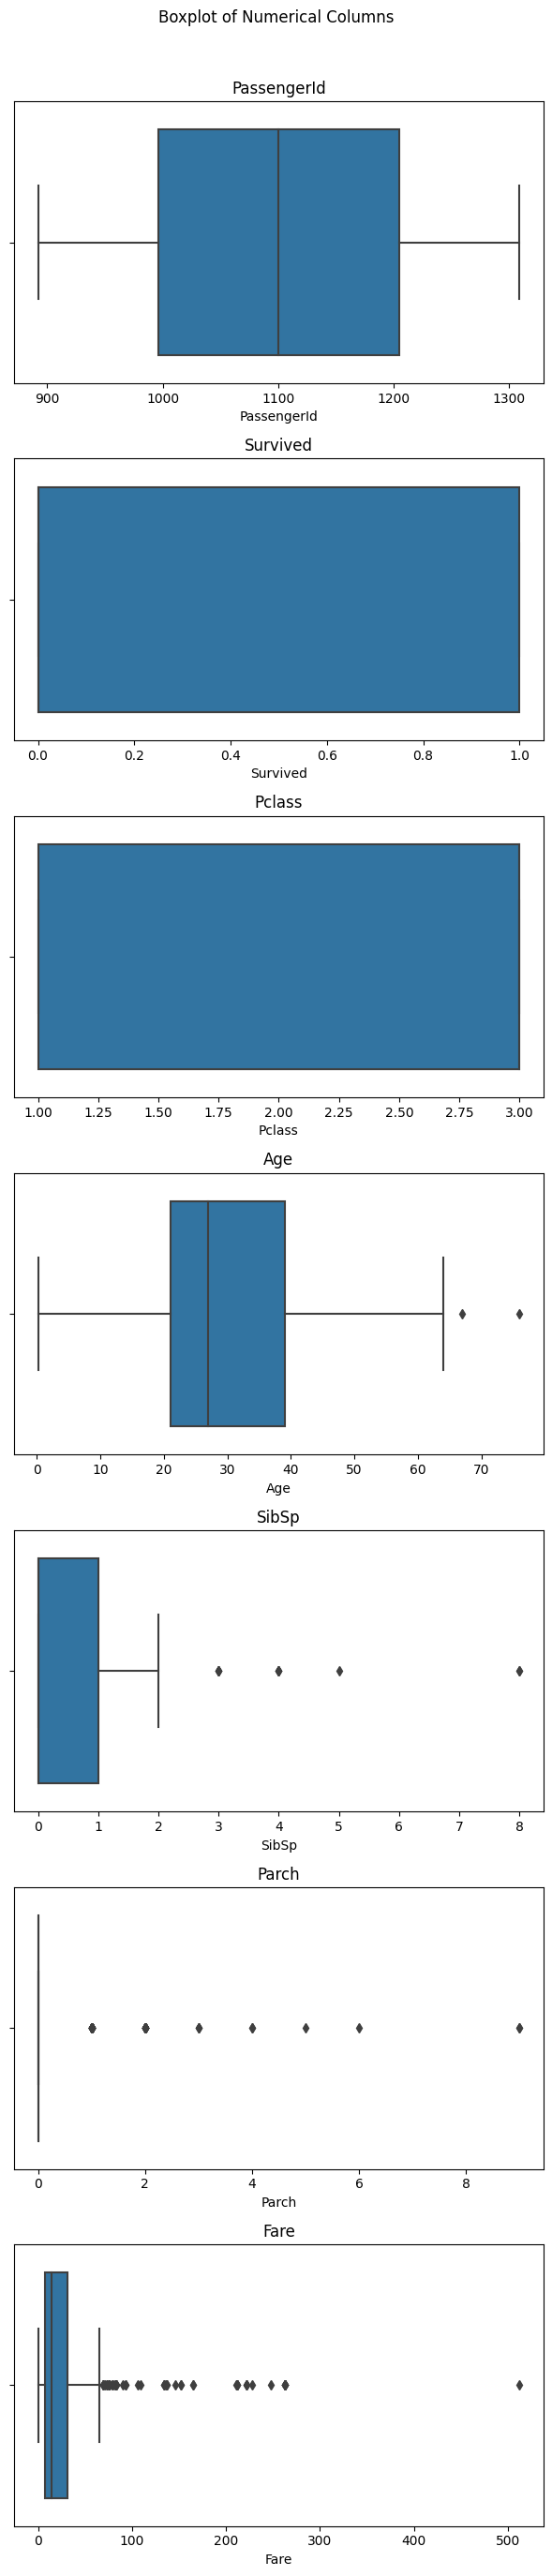

In [43]:
# Create box plots to identify outliers in numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

# List of all numerical columns
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create individual box plots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(6, 4 * len(numerical_columns)))
fig.suptitle('Boxplot of Numerical Columns')

for i, column in enumerate(numerical_columns):
  sns.boxplot(x=df[column], ax=axes[i]).set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Output:
* Menampilkan setiap box plot dari setiap kolom numerik
* Age, SibSp, Parch and Fare memiliki pencilan yang ditunjukkan oleh titik-titik di luar kuartil

<Axes: xlabel='Survived', ylabel='count'>

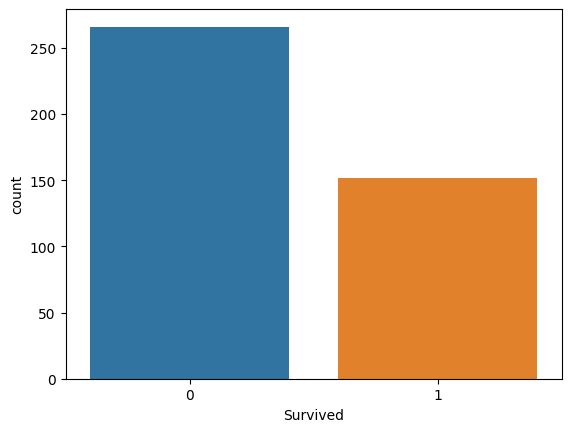

In [29]:
# Count plot for categorical data
import seaborn as sns
sns.countplot(x='Survived', data=df)

Output: Diagram batang dari kolom Survived

**Removing NaN Values and Outliers**

Menghapus baris yang tidak memiliki nilai, mendeteksi outlier dengan box plot, dan menghapus outlier berdasarkan metode IQR

  > `Prompt:  beri saya kode untuk menghapus baris dengan nilai NaN apa pun`                                           
        Tentu saja, Anda dapat menggunakan fungsi dropna() di pandas untuk menghapus baris dengan nilai NaN.
  
  > `Prompt: beri saya kode untuk menghapus pencilan dari fitur dengan box plot menggunakan dataset
titanic`                                           
       Untuk menghapus pencilan dari fitur Anda menggunakan box plot, Anda dapat menggunakan metode rentang interkuartil (IQR).


In [7]:
# Drop rows with any NaN values
df.dropna(inplace=True)

Output: Menghasilkan DataFrame df yang telah disunting secara langsung (in-place) dengan menghapus baris yang mengandung nilai NaN. Dengan mengatur parameter inplace=True, perubahan diterapkan langsung pada DataFrame yang ada

In [8]:
# Check again for missing values in each column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Output: Menunjukkan jumlah nilai yang hilang dalam masing-masing kolom DataFrame 'df'

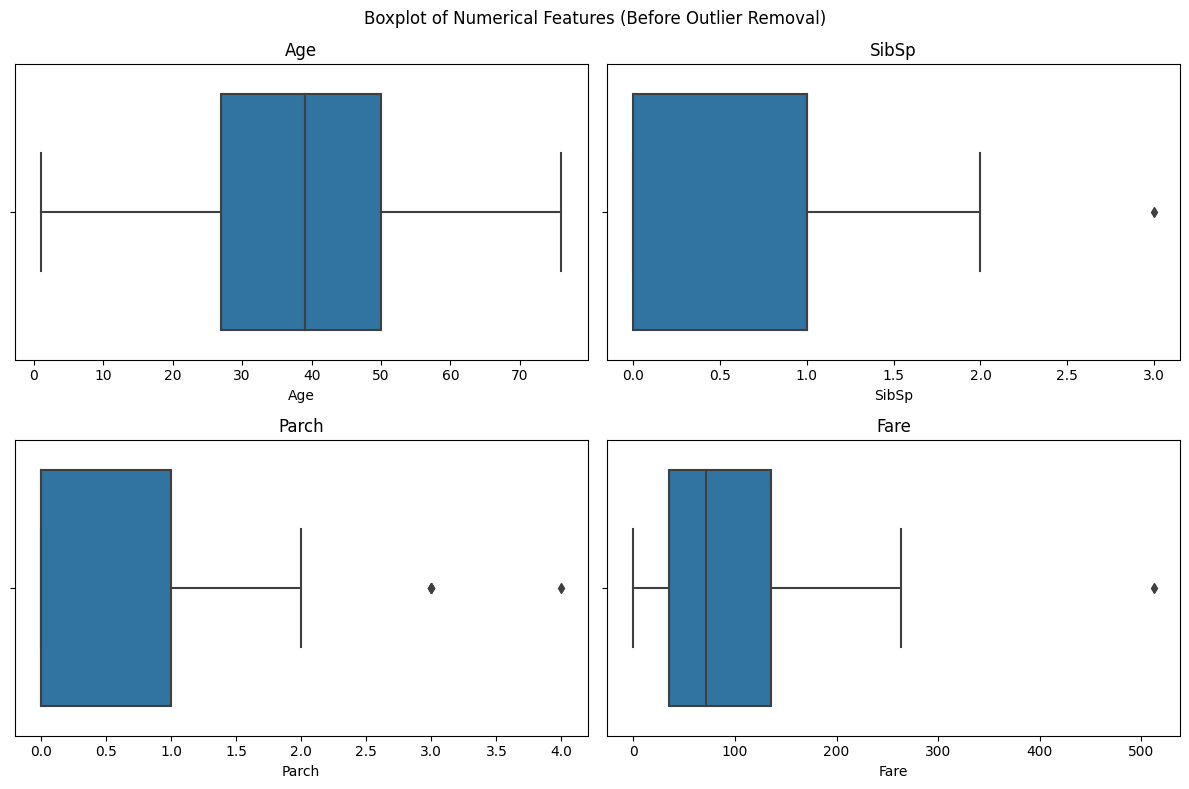

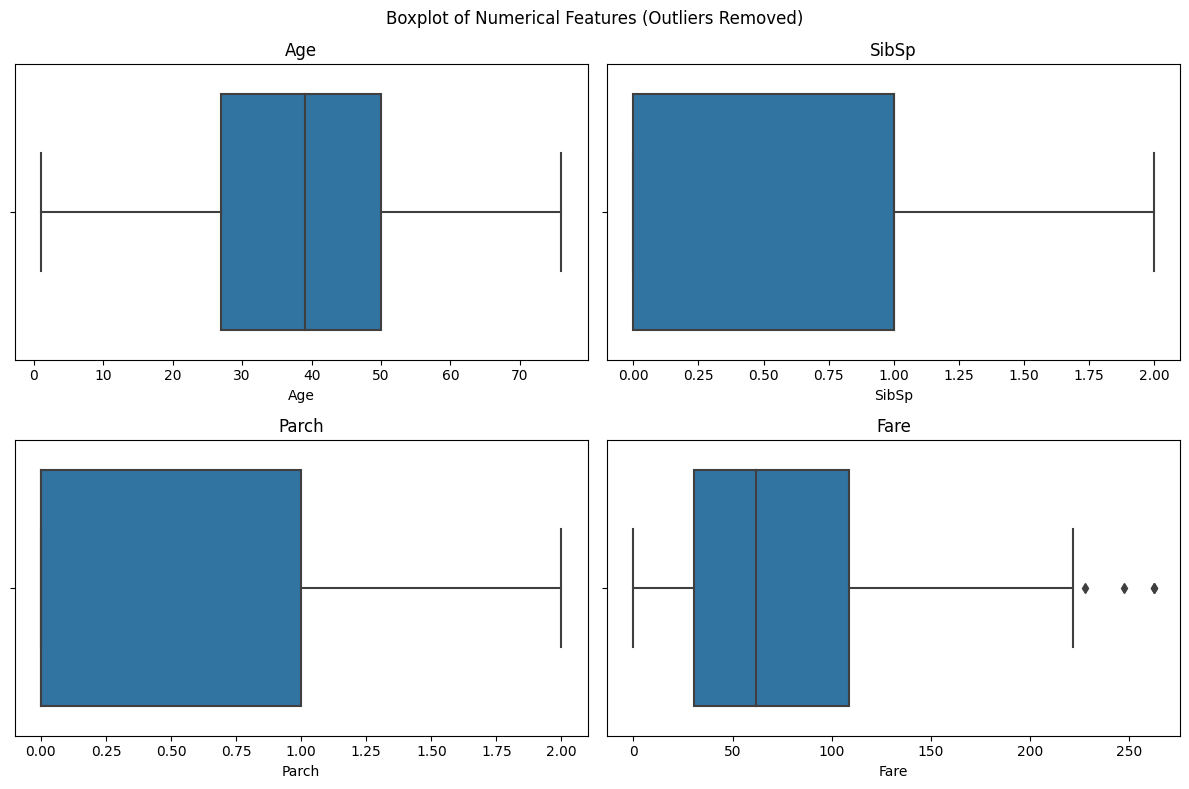

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display box plots for each numerical feature separately
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Boxplot of Numerical Features (Before Outlier Removal)')

# List of numerical features in the Titanic dataset
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Loop through each feature and create a box plot in a separate subplot
for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[feature], ax=axes[row, col]).set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Create a copy of the DataFrame to avoid modifying the original
df_no_outliers = df.copy()

# Remove outliers for each numerical feature
for feature in numerical_features:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, feature)

# Display box plots after removing outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Boxplot of Numerical Features (Outliers Removed)')

# Loop through each feature and create a box plot in a separate subplot
for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_no_outliers[feature], ax=axes[row, col]).set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()


Output: dua set box plots yang memvisualisasikan distribusi data pada fitur numerik sebelum dan setelah penghapusan outlier.

### **Visualisasi Data**

Visualisasi data adalah representasi data dalam format grafis atau visual untuk membuatnya lebih mudah dipahami, diinterpretasikan, dan mendapatkan wawasan dari data tersebut. Hal ini melibatkan penggunaan bagan, grafik, peta, dan elemen visual lainnya untuk menyajikan informasi yang kompleks dengan cara yang lebih mudah diakses dan dipahami.


  > `Prompt: berikan saya beberapa contoh melakukan visualisasi data pada data Titanic`     
  berikut adalah beberapa contoh visualisasi data pada dataset Titanic menggunakan library Seaborn dan Matplotlib di Python. Visualisasi ini membantu dalam pemahaman karakteristik data dan dapat memberikan wawasan yang berguna.



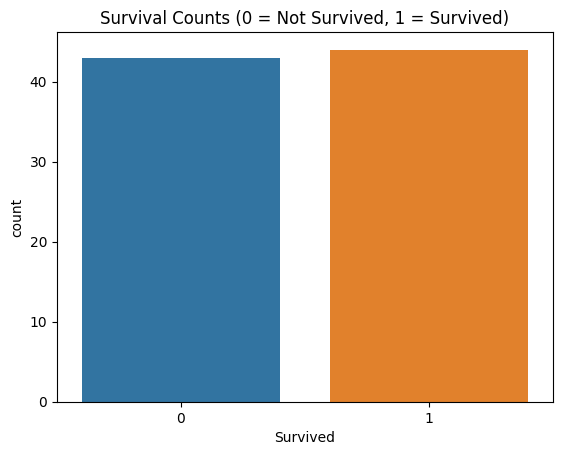

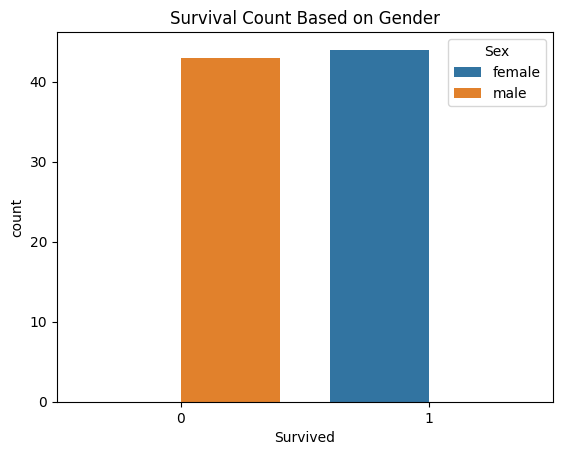

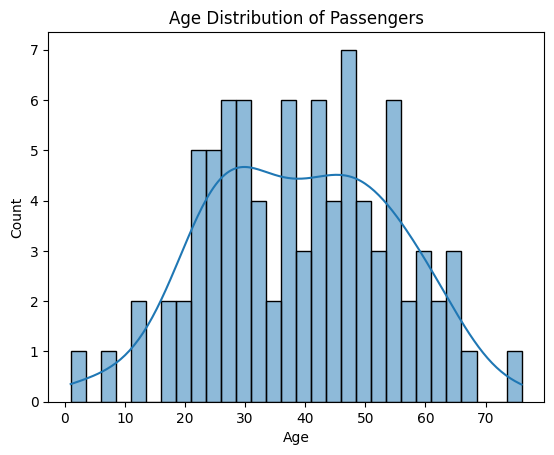

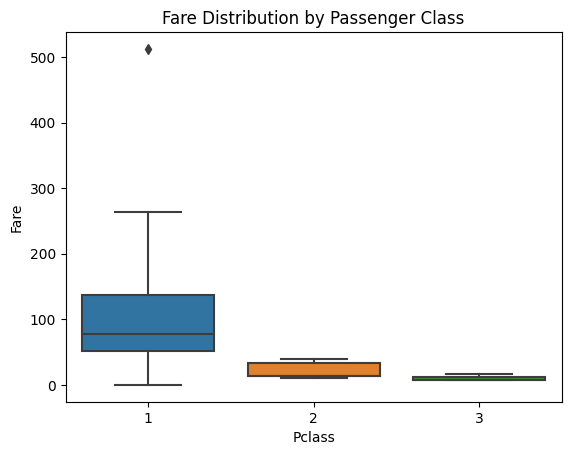

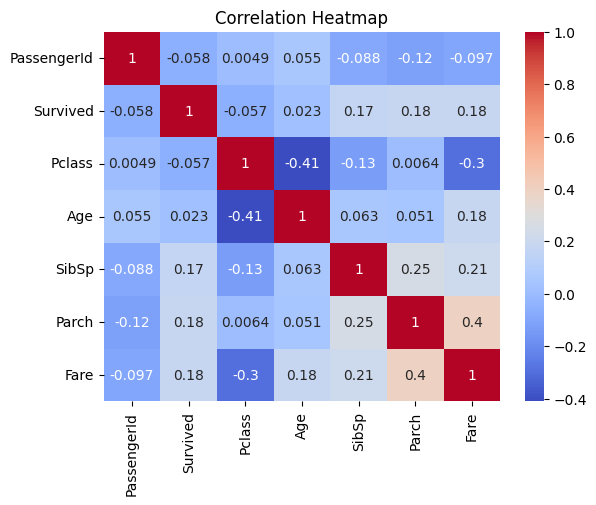

In [12]:
# Example 1: Countplot for Survival
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts (0 = Not Survived, 1 = Survived)')
plt.show()

# Example 2: Countplot for Survival based on Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count Based on Gender')
plt.show()

# Example 3: Age Distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

# Example 4: Boxplot for Fare by Class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Example 5: Heatmap for Correlation
correlation_matrix = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Output:
1. Countplot for Survival: Diagram batang yang menunjukkan jumlah penumpang yang selamat dan tidak selamat.

2. Countplot for Survival based on Gender:
Diagram batang yang membagi jumlah penumpang yang selamat dan tidak selamat berdasarkan jenis kelamin.

3. Age Distribution:
Histogram yang menunjukkan distribusi usia penumpang dengan estimasi kepadatan kernel (KDE).

4. Boxplot for Fare by Class:
Boxplot yang menunjukkan distribusi tarif berdasarkan kelas penumpang.

5. Correlation Heatmap:
Heatmap yang menunjukkan matriks korelasi antar fitur dalam dataset.

### **Training Data**

* Training data merujuk pada proses pelatihan sebuah model machine learning menggunakan dataset tertentu. Proses ini melibatkan penggunaan data yang telah diketahui labelnya (ground truth) untuk melatih model sehingga model dapat belajar pola atau hubungan antara fitur-fitur (features) dalam data tersebut dan label yang sesuai.


* Random Forest adalah metode pembelajaran ensemble yang dapat digunakan untuk tugas klasifikasi dan regresi. Metode ini beroperasi dengan membangun banyak pohon keputusan selama pelatihan dan menghasilkan kelas yang merupakan modus kelas (klasifikasi) atau prediksi rata-rata (regresi) dari masing-masing pohon.




**Splitting The Dataset**

Membagi dataset adalah langkah mendasar dalam proses membangun dan mengevaluasi model pembelajaran mesin. Langkah ini melibatkan pembagian dataset menjadi dua bagian atau lebih: biasanya set pelatihan dan set pengujian (atau validasi). Tujuan dari pemisahan dataset adalah untuk melatih model pada satu subset data dan mengevaluasi kinerjanya pada subset lain yang tidak terlihat.


> ``` Prompt: berikan saya kode untuk melakukan split Titanic dataset dengan features: ['Age', 'SibSp', 'Parch', 'Fare'] dan target: 'Survived' ```

In [16]:
from sklearn.model_selection import train_test_split

# Select features and target
features = ['Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
# Adjust the test_size and random_state according to your preference
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (69, 4)
X_test shape: (18, 4)
y_train shape: (69,)
y_test shape: (18,)


Output: memberikan informasi tentang bentuk (shape) dari set pelatihan (training set) dan set pengujian (testing set) setelah proses pemisahan menggunakan train_test_split.

Ini berarti:
* Set pelatihan (X_train dan y_train) memiliki 69 sampel dan 4 fitur.
* Set pengujian (X_test dan y_test) memiliki 18 sampel dan 4 fitur.

**Training The Dataset**

> ``` Prompt: berikan saya kode untuk melakukan train pada dataset dengan menggunakan random forest ```





In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.50

Confusion Matrix:
[[5 3]
 [6 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.57      0.40      0.47        10

    accuracy                           0.50        18
   macro avg       0.51      0.51      0.50        18
weighted avg       0.52      0.50      0.50        18



Output: memberikan informasi tentang kinerja model Random Forest pada data pengujian.
1. Accuracy: Akurasi model, yaitu proporsi dari prediksi yang benar secara keseluruhan. Pada model ini mendapatkan nilai sebesar 0.50 akurasi ini terbilang rendah atau tidak lebih baik dari prediksi acak, atau ketidakseimbangan kelas dan masih perlu diinterpretasikan dengan metriks yang lainnya.

2. Confusion Matrix: Matriks yang menunjukkan jumlah true positive, true negative, false positive, dan false negative.
True Positive (TP): 4
True Negative (TN): 5
False Positive (FP): 3
False Negative (FN): 6

3. Classification Report: Menyediakan informasi seperti precision, recall, dan f1-score untuk setiap kelas, serta metrik keseluruhan.

### **Evaluasi Data**

Evaluasi model atau evaluasi data adalah proses mengukur kinerja dan keefektifan suatu model machine learning atau algoritma berdasarkan performanya pada dataset yang telah diuji. Tujuan dari evaluasi model adalah untuk memahami sejauh mana model mampu memgeneralisasi pada data baru yang tidak pernah dilihat selama proses pelatihan.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prediksi model (y_pred) sudah dihasilkan sebelumnya

# Evaluasi menggunakan beberapa metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.50
Precision: 0.57
Recall: 0.40
F1 Score: 0.47

Confusion Matrix:
[[5 3]
 [6 4]]


Output: Secara keseluruhan, model tampaknya memiliki kinerja yang seimbang dalam mendeteksi dan memprediksi kelas positif dan negatif, tetapi ada potensi untuk perbaikan terutama dalam meningkatkan recall atau mengurangi false negative. Peningkatan model dapat melibatkan penyesuaian parameter atau penerapan teknik-teknik lainnya seperti penanganan ketidakseimbangan kelas.

### **New Data Input**

In [37]:
# 'new_data' is a new DataFrame with the same features
# Assuming the same feature names are used
new_data = pd.DataFrame({
    'Age': [25, 30, 22, 35],
    'SibSp': [1, 0, 1, 0],
    'Parch': [0, 2, 1, 0],
    'Fare': [50.0, 20.0, 30.0, 40.0]
})

# Print the new data
print("New Test Data:")
print(new_data)

# Use the trained Random Forest model to make predictions
new_predictions = random_forest.predict(new_data)

# Print the predictions
print("\nPredictions 'Survived' for new data:")
print(new_predictions)

New Test Data:
   Age  SibSp  Parch  Fare
0   25      1      0  50.0
1   30      0      2  20.0
2   22      1      1  30.0
3   35      0      0  40.0

Predictions 'Survived' for new data:
[1 1 1 1]


Output: Jadi, model Random Forest memprediksi bahwa semua penumpang pada data baru ini kemungkinan besar selamat ('Survived' = 1).